# importar pacotes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

from sklearn.linear_model import LinearRegression
from sklearn.metrics import PredictionErrorDisplay

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

# importar dados

In [69]:
df = pd.read_csv('C:/Users/l_v_v/Documents/GitHub/py6s_harmonize_sample/datasets/Landsat Sampling/Merged Landsat Data/Drop Outlier Data/clean_min_data.csv').drop(['Unnamed: 0'],axis=1)
df.columns

Index(['CHLOROPHYLL', 'CHLOROPHYLL_A', 'CHLOROPHYLL_B', 'CLOUD_COVER',
       'DEPTH_CLASS', 'DOC', 'ID', 'LATITUDE', 'LOCATION', 'LONGITUDE',
       'MISSION', 'N_TOTAL', 'N_TOTAL_DISSOLVED', 'POC', 'P_ORGANIC',
       'P_TOTAL', 'SAMPLE_SITE', 'SAMPLING_DEPTH', 'SILICA', 'SPM', 'TOC',
       'TOTAL_DEPTH', 'TURBIDITY', 'WATER_PERIOD', 'blue_max', 'blue_mean',
       'blue_median', 'blue_min', 'blue_stdDev', 'count_pixel', 'datetime',
       'dif_date_point', 'green_max', 'green_mean', 'green_median',
       'green_min', 'green_stdDev', 'img_date', 'nir_max', 'nir_mean',
       'nir_median', 'nir_min', 'nir_stdDev', 'red_max', 'red_mean',
       'red_median', 'red_min', 'red_stdDev', 'system_index',
       'dif_date_point_abs', 'satellite'],
      dtype='object')

In [411]:
def model_metrics(y_true,y_pred):
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_percentage_error
    from sklearn.metrics import explained_variance_score

    return {'r2':r2_score(y_true, y_pred),
'mae':mean_absolute_error(y_true, y_pred),
'mse':mean_squared_error(y_true, y_pred),
'mape':mean_absolute_percentage_error(y_true, y_pred),
'exp_var': explained_variance_score(y_true, y_pred)
    }

# Linear regression

In [408]:
nnlr = LinearRegression()

## subset dados de SPM e de satélite

In [417]:
df_subset = df[['SPM','blue_mean', 
       'green_mean',
       'nir_mean', 
       'red_mean']].copy()
# retirar valores em branco
df_subset = df_subset.dropna()
df_subset.isna().sum()

SPM           0
blue_mean     0
green_mean    0
nir_mean      0
red_mean      0
dtype: int64

## multiple non negative linear regression

In [418]:
# separate parameters
y = df_subset['SPM'].copy()
X = df_subset.drop('SPM',axis = 1).copy()

In [419]:
nnlr_fit = nnlr.fit(X, y)
y_pred_mlr = nnlr_fit.predict(X)

In [420]:
print(f"intercept: {nnlr_fit.intercept_}")
for n in range(len(X.columns)):

    print(f"{X.columns[n]} coef: {nnlr_fit.coef_[n]}")

intercept: -12.007375060336443
blue_mean coef: -1356.2182115072592
green_mean coef: 1045.320032406427
nir_mean coef: 6204.051591240126
red_mean coef: -626.0512685569544


In [421]:
metrics = model_metrics(y,y_pred_mlr)
print('Metrics:')
print(metrics)

Metrics:
{'r2': 0.7312429382255918, 'mae': 25.662056294174945, 'mse': 1442.4266602697803, 'mape': 0.6272036469220749, 'exp_var': 0.7312429382255918}


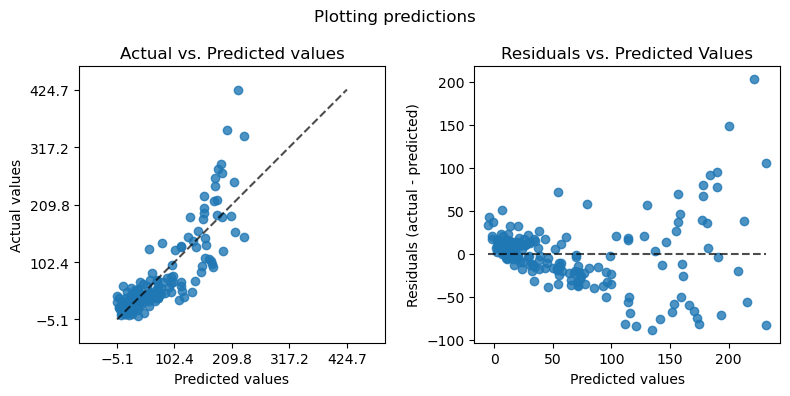

In [422]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred_mlr,
    kind="actual_vs_predicted",
    ax=axs[0]
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred_mlr,
    kind="residual_vs_predicted",
    ax=axs[1]
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting predictions")
plt.tight_layout()
plt.show()

## multiple linear regression for SPM < 100

In [452]:
# separate parameters
subset_lt100 = df_subset.loc[df_subset['SPM'] < 100].copy()

y = subset_lt100['SPM'].copy()
X = subset_lt100.drop(['SPM'],axis=1).copy()

In [453]:
y_pred_mlr = nnlr.fit(X, y).predict(X)

In [454]:
print(f"intercept: {nnlr_fit.intercept_}")
for n in range(len(X.columns)):

    print(f"{X.columns[n]} coef: {nnlr_fit.coef_[n]}")


intercept: -0.8759808092366228
blue_mean coef: -1372.9578351029568
green_mean coef: 1399.4535128534872
nir_mean coef: 1811.1736792348186
red_mean coef: 152.94388601341626


In [455]:
metrics = model_metrics(y,y_pred_mlr)
print('Metrics:')
print(metrics)

Metrics:
{'r2': 0.6999247686700674, 'mae': 8.291733857416638, 'mse': 133.6159010687398, 'mape': 0.3559847161228037, 'exp_var': 0.6999247686700674}


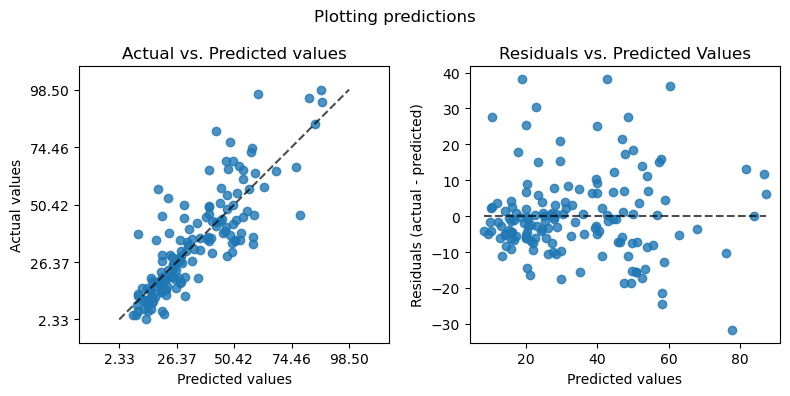

In [456]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred_mlr,
    kind="actual_vs_predicted",
    ax=axs[0]
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred_mlr,
    kind="residual_vs_predicted",
    ax=axs[1]
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting predictions")
plt.tight_layout()
plt.show()

## multiple non negative linear regression for SPM > 100

In [500]:
# separate parameters
subset_gt100 = df_subset.loc[df_subset['SPM'] > 100].copy()

y = subset_gt100['SPM'].copy()
X = subset_gt100.drop(['SPM'],axis=1).copy()

In [496]:
y_pred_mlr = nnlr.fit(X, y).predict(X)

In [497]:
print(f"intercept: {nnlr_fit.intercept_}")
for n in range(len(X.columns)):

    print(f"{X.columns[n]} coef: {nnlr_fit.coef_[n]}")

intercept: 11.65266222492707
blue_mean coef: 3458.4463745270864
green_mean coef: -1673.2043667547016
nir_mean coef: 7306.950527288197
red_mean coef: -943.2560613486919


In [498]:
metrics = model_metrics(y,y_pred_mlr)
print('Metrics:')
print(metrics)

Metrics:
{'r2': 0.3511367478869145, 'mae': 45.04782091919546, 'mse': 3572.6389633370754, 'mape': 0.2536488636812544, 'exp_var': 0.3511367478869146}


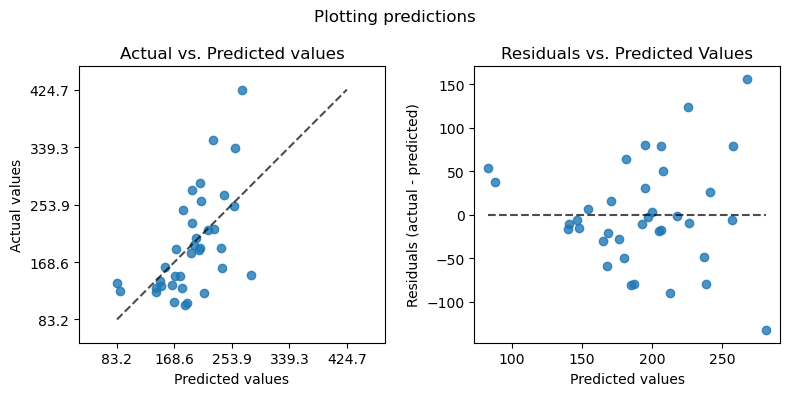

In [501]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred_mlr,
    kind="actual_vs_predicted",
    ax=axs[0]
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred_mlr,
    kind="residual_vs_predicted",
    ax=axs[1]
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting predictions")
plt.tight_layout()
plt.show()

# Polynomial multiple regression

In [524]:
# separate parameters
y = df_subset['SPM'].copy()
X = df_subset.drop(['SPM'],axis = 1).copy()

In [525]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(positive=False))])
# fit to an order-3 polynomial data

model_fit = model.fit(X, y)
model_fit.named_steps['linear'].coef_


array([      0.        ,   -1125.08018111,   -6870.9283391 ,
         -1628.96907171,    5836.86562904,  -27377.80932747,
       -524702.41476945, -163201.45473153,  495156.28747796,
        421579.05968569,  180494.68888657, -218479.87695168,
        213018.90590744,  -75007.38485381, -107644.04230501])

In [526]:
y_pred_model = model_fit.predict(X)

In [527]:
metrics = model_metrics(y,y_pred_model)
print('Metrics:')
print(metrics)

Metrics:
{'r2': 0.8067844304170517, 'mae': 19.678273162345384, 'mse': 1036.9933608650354, 'mape': 0.4190075349016702, 'exp_var': 0.8067844304170517}


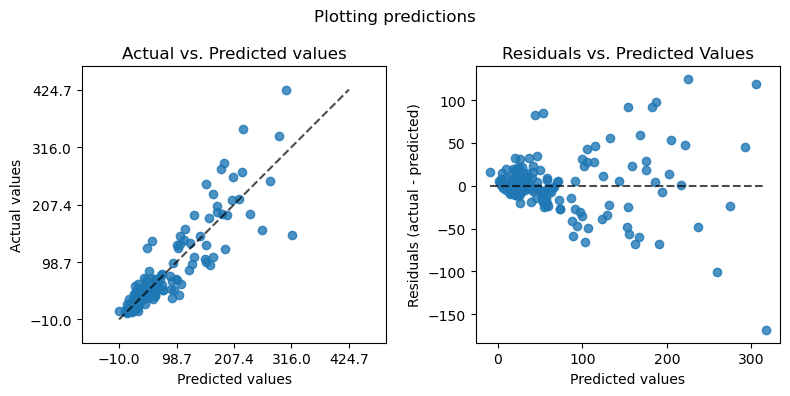

In [528]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred_model,
    kind="actual_vs_predicted",
    ax=axs[0]
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred_model,
    kind="residual_vs_predicted",
    ax=axs[1]
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting predictions")
plt.tight_layout()
plt.show()

# Polynomial regression SPM < 100

In [586]:
# separate parameters
y = subset_lt100['SPM'].copy()
X = subset_lt100.drop(['SPM'],axis = 1).copy()
# X = subset_lt100.drop(['SPM','red_mean'],axis = 1).copy()

In [587]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(positive=False))])
# fit to an order-3 polynomial data

model_fit = model.fit(X, y)
model_fit.named_steps['linear'].coef_


array([     0.        ,  -1811.8929195 ,   1713.17876589,    316.0160488 ,
         1028.6823158 , -65630.01650763,  75256.17779325,   5527.29662495,
         9854.44211616, -42270.82135604, 101253.47026051, -12293.93608636,
        40432.30006594, -61331.9630013 ,  -2912.60240834])

In [588]:
y_pred_model = model_fit.predict(X)

In [589]:
metrics = model_metrics(y,y_pred_model)
print('Metrics:')
print(metrics)

Metrics:
{'r2': 0.7184177490285641, 'mae': 8.17815797794318, 'mse': 125.38144525212411, 'mape': 0.31456150974932084, 'exp_var': 0.7184177490285641}


In [569]:
metrics = model_metrics(y,y_pred_model)
print('Metrics: no red')
print(metrics)

Metrics: no red
{'r2': 0.7146649078538203, 'mae': 8.111573834581534, 'mse': 127.05249038606898, 'mape': 0.3174508117212128, 'exp_var': 0.7146649078538203}


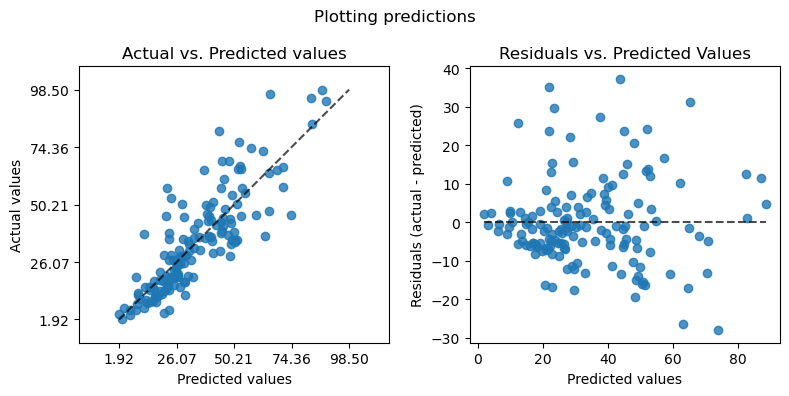

In [590]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred_model,
    kind="actual_vs_predicted",
    ax=axs[0]
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred_model,
    kind="residual_vs_predicted",
    ax=axs[1]
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting predictions")
plt.tight_layout()
plt.show()

# Polynomial regression SPM > 100

In [609]:
# separate parameters
y = subset_gt100['SPM'].copy()
X = subset_gt100.drop(['SPM'],axis = 1).copy()

In [610]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(positive=False))])
# fit to an order-3 polynomial data

model_fit = model.fit(X, y)
model_fit.named_steps['linear'].coef_


array([ 0.00000000e+00,  3.65118202e+04, -1.06892063e+05, -6.85354793e+03,
        1.61206831e+04,  7.64160623e+06, -1.76347947e+07, -5.78535148e+05,
        6.76916032e+06,  1.11229179e+07,  7.70871895e+05, -7.30622745e+06,
        1.99514616e+05, -2.79032427e+05,  1.29151192e+06])

In [611]:
y_pred_model = model_fit.predict(X)

In [612]:
metrics = model_metrics(y,y_pred_model)
print('Metrics:')
print(metrics)

Metrics:
{'r2': 0.6265916804073521, 'mae': 33.721989954555006, 'mse': 2055.9849975575667, 'mape': 0.18905675455608534, 'exp_var': 0.626591680407352}


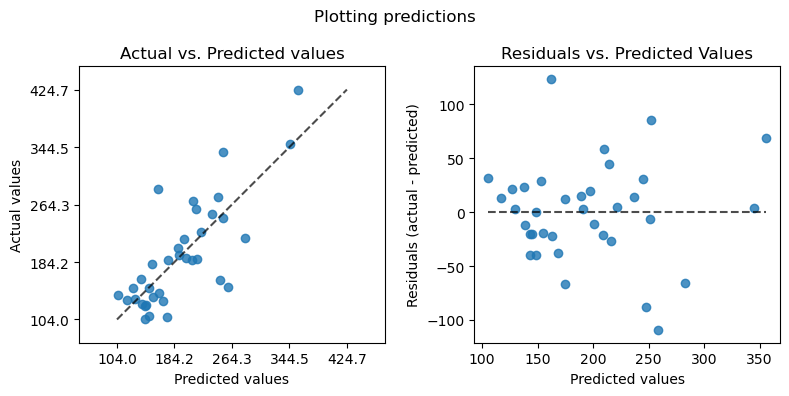

In [613]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred_model,
    kind="actual_vs_predicted",
    ax=axs[0]
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred_model,
    kind="residual_vs_predicted",
    ax=axs[1]
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting predictions")
plt.tight_layout()
plt.show()

# Polynomial NIR regression

In [634]:
# separate parameters
y = df_subset['SPM'].copy()
X = np.array(df_subset['nir_mean']).reshape(-1, 1) .copy()

In [637]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
model = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                  ('linear', LinearRegression(positive=False))])
# fit to an order-3 polynomial data

model_fit = model.fit(X, y)
model_fit.named_steps['linear'].coef_


array([  -568.02278611, 175272.81556   ])

In [640]:
y_pred_model = model_fit.predict(X)

In [641]:
metrics = model_metrics(y,y_pred_model)
print('Metrics:')
print(metrics)

Metrics:
{'r2': 0.7834035765581147, 'mae': 21.709839272638558, 'mse': 1162.4790568439228, 'mape': 0.5680294729945503, 'exp_var': 0.7834035765581145}


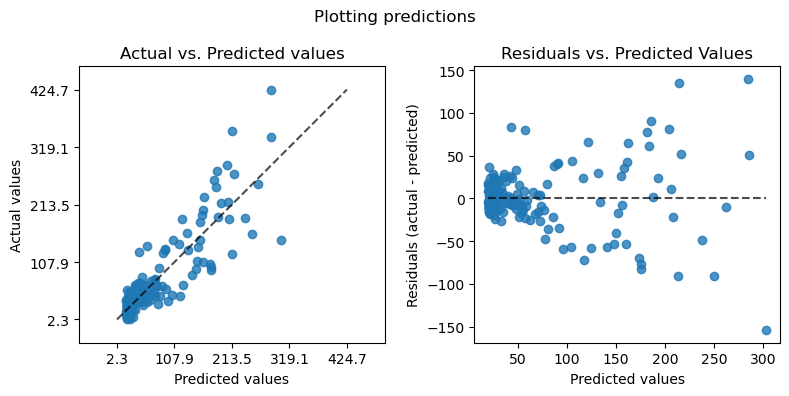

In [642]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred_model,
    kind="actual_vs_predicted",
    ax=axs[0]
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred_model,
    kind="residual_vs_predicted",
    ax=axs[1]
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting predictions")
plt.tight_layout()
plt.show()

# Polynomial NIR regression SPM < 

In [ ]:
# separate parameters
y = df_subset['SPM'].copy()
X = np.array(df_subset['nir_mean']).reshape(-1, 1) .copy()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
model = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                  ('linear', LinearRegression(positive=False))])
# fit to an order-3 polynomial data

model_fit = model.fit(X, y)
model_fit.named_steps['linear'].coef_


array([  -568.02278611, 175272.81556   ])

In [ ]:
y_pred_model = model_fit.predict(X)

In [ ]:
metrics = model_metrics(y,y_pred_model)
print('Metrics:')
print(metrics)

Metrics:
{'r2': 0.7834035765581147, 'mae': 21.709839272638558, 'mse': 1162.4790568439228, 'mape': 0.5680294729945503, 'exp_var': 0.7834035765581145}
